In [72]:
from src.data_functions import wrangle
w = wrangle()
pat = pd.read_csv('data/patient_int.csv')
appt = pd.read_csv('data/appt_cleaned.csv', low_memory=False)

In [73]:
freq = appt.merge(pat)
w.todate(freq, ['Birthdate', 'AptDateTime', 'DateFirstVisit', ])
freq['AptDateTime'] = freq.AptDateTime.dt.date
freq['AptDateTime'] = pd.to_datetime(freq['AptDateTime'])
w.downcast(freq)

### Build Frequency Table for Kmeans

In [92]:
freqs = freq.loc[:, ['PatNum', 'AptDateTime']]
frequency = freqs.groupby('PatNum')['AptDateTime'].count().to_frame().reset_index()

In [93]:
frequency.rename(columns={'AptDateTime':'Frequency'}, inplace=True)
frequency.sort_values('Frequency')

,PatNum,Frequency
5753,8549,1
5506,8220,1
3881,6215,1
3021,5155,1
3023,5159,1
...,...,...
963,2531,92
1812,3572,92
925,2483,107
2786,4843,113


### Frequency Distribution

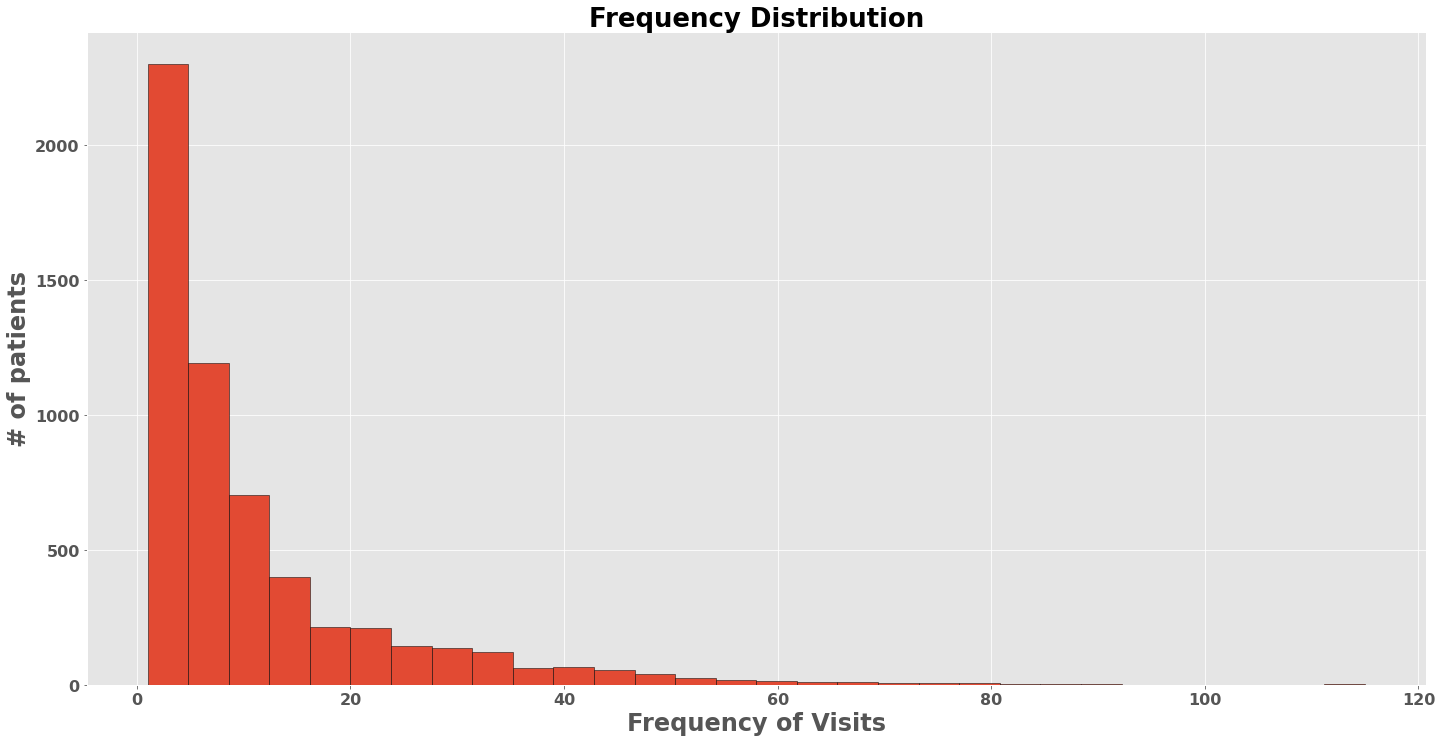

In [95]:
fig = plt.figure(figsize=(24, 12))
plot = frequency['Frequency'].hist(bins=30, edgecolor='black')
title = plt.title('Frequency Distribution', fontweight='bold', fontsize=26)
xticks = plt.xticks(fontweight='bold', fontsize=16)
yticks = plt.yticks(fontweight='bold', fontsize=16)
xlabel = plt.xlabel('Frequency of Visits', fontweight='bold', fontsize = 24)
ylabel = plt.ylabel('# of patients',  fontweight='bold', fontsize = 24)

In [252]:
date_range = freqs.pivot_table(values='AptDateTime', index='PatNum', aggfunc=['min', 'max'])
tenure = (date_range.iloc[:, 1] - date_range.iloc[:, 0]).dt.days/365
tenure = tenure.to_frame(name='tenure').reset_index().merge(frequency)

In [253]:
def ufunc(row):
    if row == 0:
        return 1
    else: return row
tenure['tenure'] = tenure['tenure'].apply(ufunc)

In [254]:
tenure['vpy'] = tenure.Frequency/tenure.tenure

In [260]:
loyalists = tenure[tenure.vpy.between(2,4)].sort_values('tenure', ascending=False)

In [261]:
len(loyalists)

1942

In [263]:
loyalists[loyalists['tenure'] > 1]

,PatNum,tenure,Frequency,vpy
6,38,17.931507,46,2.565317
327,1611,17.854795,36,2.016265
643,2112,17.810959,56,3.144132
374,1707,17.791781,70,3.934401
601,2059,17.780822,51,2.868259
...,...,...,...,...
3200,5387,1.019178,4,3.924731
5355,8030,1.019178,3,2.943548
5040,7618,1.016438,3,2.951482
228,1363,1.008219,4,3.967391


In [264]:
tenure.to_csv('data/frequency.csv', index=False)